# Reconstruction of DOSY NMR signals - Part I

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random

## 1) Generation of synthetic data


$\underline{\textbf{Q1.}}$ Let's read the signal data from the file "signal.dat" 

In [2]:
N = 200
signal = np.zeros(N)

filepath = 'signal.txt'  
with open(filepath) as fp:  
    line = fp.readline()
    cnt = 1
    while line:
        signal[cnt-1] = np.float64(line)
        line = fp.readline()
        cnt += 1
    
signal

array([2.0440461e-15, 9.5346375e-15, 4.2731280e-14, 1.8399916e-13,
       7.6122670e-13, 3.0258013e-12, 1.1555667e-11, 4.2401169e-11,
       1.4948199e-10, 5.0632357e-10, 1.6477664e-09, 5.1521838e-09,
       1.5478015e-08, 4.4675295e-08, 1.2389329e-07, 3.3010826e-07,
       8.4507101e-07, 2.0785393e-06, 4.9119223e-06, 1.1152519e-05,
       2.4328910e-05, 5.0991828e-05, 1.0268493e-04, 1.9867402e-04,
       3.6932070e-04, 6.5962097e-04, 1.1319141e-03, 1.8662109e-03,
       2.9562161e-03, 4.4992472e-03, 6.5791799e-03, 9.2434029e-03,
       1.2477289e-02, 1.6182171e-02, 2.0164227e-02, 2.4140963e-02,
       2.7768717e-02, 3.0689178e-02, 3.2586891e-02, 3.3245190e-02,
       3.2586892e-02, 3.0689180e-02, 2.7768719e-02, 2.4140966e-02,
       2.0164233e-02, 1.6182182e-02, 1.2477307e-02, 9.2434342e-03,
       6.5792322e-03, 4.4993339e-03, 2.9563583e-03, 1.8664419e-03,
       1.1322857e-03, 6.6021251e-04, 3.7025309e-04, 2.0012899e-04,
       1.0493282e-04, 5.4430173e-05, 2.9535840e-05, 1.8959282e

$\underline{\textbf{Q2.}}$  We create first T using an exponential sampling strategy:

In [3]:
T_min = 1 
T_max = 1000
T = np.array([T_min*np.exp(-n*(np.log(T_min/T_max))/(N-1)) for n in range(N)],dtype=np.float64)
T

array([   1.        ,    1.03532184,    1.07189132,    1.1097525 ,
          1.148951  ,    1.18953407,    1.2315506 ,    1.27505124,
          1.3200884 ,    1.36671636,    1.4149913 ,    1.4649714 ,
          1.51671689,    1.57029012,    1.62575567,    1.68318035,
          1.74263339,    1.80418641,    1.8679136 ,    1.93389175,
          2.00220037,    2.07292178,    2.1461412 ,    2.22194686,
          2.30043012,    2.38168555,    2.46581108,    2.55290807,
          2.64308149,    2.73644   ,    2.8330961 ,    2.93316628,
          3.03677112,    3.14403547,    3.2550886 ,    3.37006433,
          3.48910121,    3.6123427 ,    3.7399373 ,    3.87203878,
          4.00880633,    4.15040476,    4.2970047 ,    4.44878283,
          4.60592204,    4.7686117 ,    4.93704785,    5.11143348,
          5.29197874,    5.47890118,    5.67242607,    5.87278661,
          6.08022426,    6.29498899,    6.5173396 ,    6.74754405,
          6.98587975,    7.2326339 ,    7.48810386,    7.75259

$\underline{\textbf{Q3.}}$ Display the original signal $\bar{x}$ as a function of T

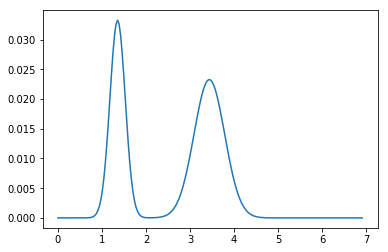

In [4]:
plt.plot(np.log(T),signal)

$\underline{\textbf{Q4.}}$  Create t using a regular sampling strategy 

In [5]:
M = 50 
t_min = 0
t_max = 1.5
t = np.array([t_min + ((m-1)/(M-1))*(t_max - t_min) for m in range(1,M+1)],dtype=np.float64)
t

array([0.        , 0.03061224, 0.06122449, 0.09183673, 0.12244898,
       0.15306122, 0.18367347, 0.21428571, 0.24489796, 0.2755102 ,
       0.30612245, 0.33673469, 0.36734694, 0.39795918, 0.42857143,
       0.45918367, 0.48979592, 0.52040816, 0.55102041, 0.58163265,
       0.6122449 , 0.64285714, 0.67346939, 0.70408163, 0.73469388,
       0.76530612, 0.79591837, 0.82653061, 0.85714286, 0.8877551 ,
       0.91836735, 0.94897959, 0.97959184, 1.01020408, 1.04081633,
       1.07142857, 1.10204082, 1.13265306, 1.16326531, 1.19387755,
       1.2244898 , 1.25510204, 1.28571429, 1.31632653, 1.34693878,
       1.37755102, 1.40816327, 1.43877551, 1.46938776, 1.5       ])

 $\underline{\textbf{Q4.}}$ Construct matrix K using (3)

In [52]:
##### I should change this (no loop) ###########

K = np.zeros((M,N))

for n in range(N):
    for m in range(M):
        K[m,n] = np.exp(- t[m]*T[n])

print(K)
print(K.shape)
print(np.linalg.matrix_rank(K,tol=1e-17))

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.69851565e-01 9.68803450e-01 9.67719507e-01 ... 3.95314811e-13
  1.44159827e-13 5.07307125e-14]
 [9.40612058e-01 9.38580124e-01 9.36481044e-01 ... 1.56273800e-25
  2.07820558e-26 2.57360519e-27]
 ...
 [2.37218052e-01 2.25463789e-01 2.13907633e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.30066299e-01 2.18430097e-01 2.07002589e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.23130160e-01 2.11615831e-01 2.00320443e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(50, 200)
50


$\underline{\textbf{Q5.}}$ Simulate the noisy data according to model (2), by taking $w \sim \mathcal{N} (0, \sigma^2 I_{M})$ with $\sigma = 0.01z^{(1)}$ , where $z = K\bar{x}$

In [74]:
x = signal
xmin = min(x)
xmax= max(x)
z = np.dot(K,x)
sigma = 0.01*z[0]
mean = np.zeros(M)
cov  = (sigma**2)*np.eye(M)

w = np.random.multivariate_normal(mean, cov)
y = z + w

$\underline{\textbf{Q6.}}$ Display the resulting noisy data y as a function of t

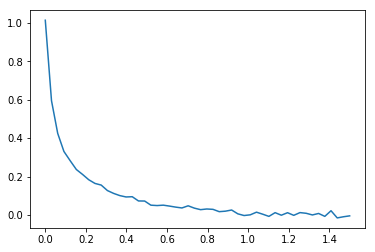

In [8]:
plt.plot(t,y)

## 2) Comparison of regularization strategies

###  Smoothness prior

Defintion of D

In [9]:
D = np.eye(N)

for n in range(N-1):
    D[n+1,n] = -1

D[0,N-1] = -1

$\underline{\textbf{Q3.}}$ Resolving the optimization problem

In [10]:
beta = 1
x_hat = np.dot(np.linalg.inv(np.dot(K.T,K) + beta*np.dot(D.T,D)),np.dot(K.T,y))

In [11]:
def normalized_MSE(x,y):
    return( (np.linalg.norm(x-y)/np.linalg.norm(y))**2)

0.5452619070863907


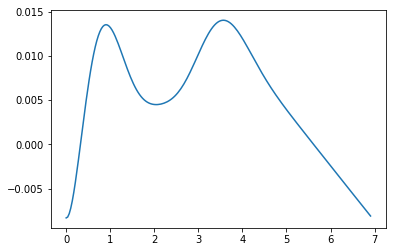

In [12]:
print(normalized_MSE(x_hat,x))
plt.plot(np.log(T),x_hat)

$\underline{\textbf{Q4.}}$ Tunning $\beta$ with a grid search 

MSE : 8.50720675753449, beta : 0.0009999999999999994


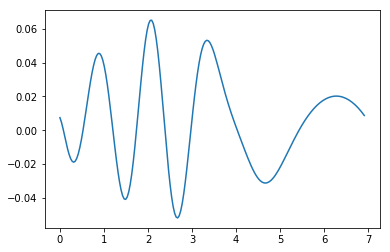

MSE : 2.792020429214104, beta : 0.009999999999999995


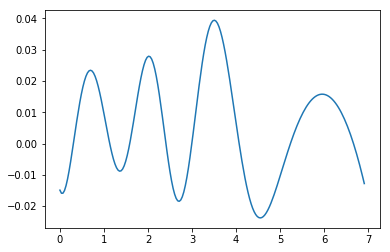

MSE : 0.7375546776309461, beta : 0.09999999999999998


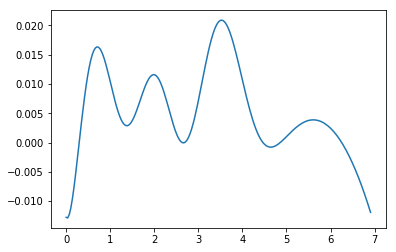

MSE : 0.5452619070863907, beta : 1.0


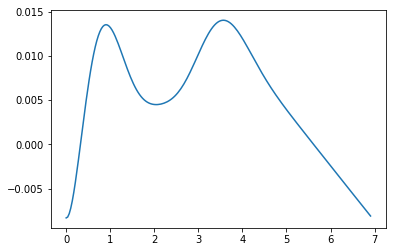

MSE : 0.46628020089001093, beta : 10.000000000000002


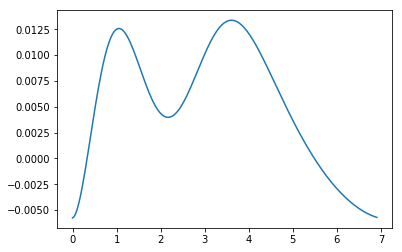

MSE : 0.467816351311863, beta : 100.00000000000004


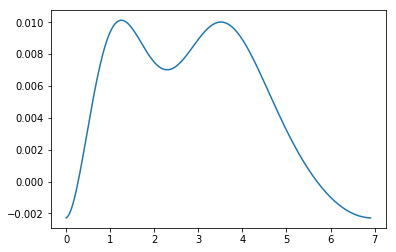

MSE : 0.5644139896729763, beta : 1000.0000000000007


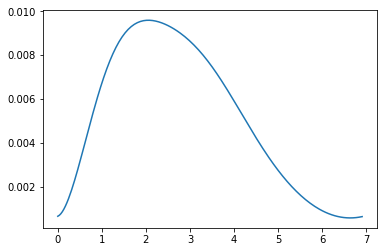

In [13]:
beta_grid = np.exp(np.log(10)*np.linspace(-3,3,7))
errors = np.zeros(beta_grid.shape[0])

for i in range(beta_grid.shape[0]):
    beta = beta_grid[i]
    x_hat = np.dot(np.linalg.inv(np.dot(K.T,K) + beta*np.dot(D.T,D)),np.dot(K.T,y))
    errors[i] = normalized_MSE(x_hat,x)
    print("MSE : {}, beta : {}".format(normalized_MSE(x_hat,x),beta))
    plt.plot(np.log(T),x_hat)
    plt.show()

### Smoothness prior + constraints 


Objectif : 1e+30, ||Ku-y||^2 : 2481.8194789102695, ||Du||^2 : 5.57793501801565, ind : 1e+30
Objectif : 396.5876951094645, ||Ku-y||^2 : 793.1436954256952, ||Du||^2 : 0.3169479323372686, ind : 0
Objectif : 391.63964485189143, ||Ku-y||^2 : 783.2478347290346, ||Du||^2 : 0.31454974748219716, ind : 0
Objectif : 386.82603017456626, ||Ku-y||^2 : 773.6208424830264, ||Du||^2 : 0.3121786610612453, ind : 0
Objectif : 382.142586092984, ||Ku-y||^2 : 764.2541887609173, ||Du||^2 : 0.30983425050728597, ind : 0
Objectif : 377.6421470210732, ||Ku-y||^2 : 755.2535451619757, ||Du||^2 : 0.30748880170721266, ind : 0
Objectif : 373.2746885758387, ||Ku-y||^2 : 746.5188608663007, ||Du||^2 : 0.30516285376784824, ind : 0
Objectif : 369.02504119975316, ||Ku-y||^2 : 738.0197962669697, ||Du||^2 : 0.3028613253663145, ind : 0
Objectif : 364.890820500643, ||Ku-y||^2 : 729.7515826475039, ||Du||^2 : 0.3005835378205138, ind : 0
Objectif : 360.86927047244797, ||Ku-y||^2 : 721.7087080529833, ||Du||^2 : 0.29832891912623627, 

Objectif : 205.86164283057457, ||Ku-y||^2 : 411.709936156656, ||Du||^2 : 0.13349504493112344, ind : 0
Objectif : 205.43964593741143, ||Ku-y||^2 : 410.8660271964269, ||Du||^2 : 0.132646783959737, ind : 0
Objectif : 205.0290069743235, ||Ku-y||^2 : 410.0448332914683, ||Du||^2 : 0.13180657178703817, ind : 0
Objectif : 204.62947279376772, ||Ku-y||^2 : 409.24584814704286, ||Du||^2 : 0.1309744049255515, ind : 0
Objectif : 204.24079651350223, ||Ku-y||^2 : 408.4685779989242, ||Du||^2 : 0.13015028080259536, ind : 0
Objectif : 203.86273733884335, ||Ku-y||^2 : 407.7125412579138, ||Du||^2 : 0.1293341977285924, ind : 0
Objectif : 203.49506039069672, ||Ku-y||^2 : 406.9772681659069, ||Du||^2 : 0.1285261548655579, ind : 0
Objectif : 203.13753653914847, ||Ku-y||^2 : 406.2623004630774, ||Du||^2 : 0.12772615219572261, ind : 0
Objectif : 202.79520846064986, ||Ku-y||^2 : 405.57772393643194, ||Du||^2 : 0.12692984867799745, ind : 0
Objectif : 202.4724048827059, ||Ku-y||^2 : 404.9321964265129, ||Du||^2 : 0.126

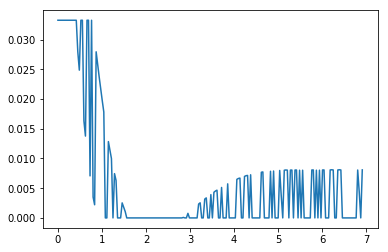

MSE : 362.69155295034614, beta : 0.09999999999999998

Objectif : 1e+30, ||Ku-y||^2 : 3375.1347571124456, ||Du||^2 : 6.18992137388514, ind : 1e+30
Objectif : 439.01269764631934, ||Ku-y||^2 : 877.9090395135025, ||Du||^2 : 0.32376686723631126, ind : 0
Objectif : 432.9448430784126, ||Ku-y||^2 : 865.7743106800727, ||Du||^2 : 0.3210391176214677, ind : 0
Objectif : 427.0446720308811, ||Ku-y||^2 : 853.9749385579527, ||Du||^2 : 0.3183401102893678, ind : 0
Objectif : 421.3086137039884, ||Ku-y||^2 : 842.5037818628316, ||Du||^2 : 0.3156689682820836, ind : 0
Objectif : 415.7312097874181, ||Ku-y||^2 : 831.3499241154707, ||Du||^2 : 0.313025298163187, ind : 0
Objectif : 410.30722496518115, ||Ku-y||^2 : 820.5028948197895, ||Du||^2 : 0.3104087217885083, ind : 0
Objectif : 405.0316363567477, ||Ku-y||^2 : 809.952648345366, ||Du||^2 : 0.30781887565163507, ind : 0
Objectif : 399.8996235049265, ||Ku-y||^2 : 799.689543903419, ||Du||^2 : 0.3052554102594357, ind : 0
Objectif : 394.90655888071603, ||Ku-y||^2 : 7

Objectif : 219.8046409206198, ||Ku-y||^2 : 439.5561703700114, ||Du||^2 : 0.1477858236310793, ind : 0
Objectif : 219.00466893978123, ||Ku-y||^2 : 437.9566259728601, ||Du||^2 : 0.14667401160296387, ind : 0
Objectif : 218.1418940826153, ||Ku-y||^2 : 436.2314714940518, ||Du||^2 : 0.1455742452807054, ind : 0
Objectif : 217.3033865997021, ||Ku-y||^2 : 434.5548475163938, ||Du||^2 : 0.14448629747652325, ind : 0
Objectif : 216.48854757434617, ||Ku-y||^2 : 432.9255562235219, ||Du||^2 : 0.14341012081269686, ind : 0
Objectif : 215.6967947340031, ||Ku-y||^2 : 431.34243308664134, ||Du||^2 : 0.142345669949707, ind : 0
Objectif : 214.9275619092901, ||Ku-y||^2 : 429.8043457825743, ||Du||^2 : 0.14129290151383103, ind : 0
Objectif : 214.18034225851702, ||Ku-y||^2 : 428.31028065262177, ||Du||^2 : 0.14025174682793154, ind : 0
Objectif : 213.45480115837017, ||Ku-y||^2 : 426.8595685102131, ||Du||^2 : 0.13922203878061978, ind : 0
Objectif : 212.7504015727728, ||Ku-y||^2 : 425.4511352961192, ||Du||^2 : 0.13820

Objectif : 180.96385607873304, ||Ku-y||^2 : 361.89631300683055, ||Du||^2 : 0.08737000182220153, ind : 0
Objectif : 180.84519391680413, ||Ku-y||^2 : 361.65914957552684, ||Du||^2 : 0.08692230873305755, ind : 0
Objectif : 180.73053785720788, ||Ku-y||^2 : 361.4299967173546, ||Du||^2 : 0.08647915548378743, ind : 0
Objectif : 180.62377219786995, ||Ku-y||^2 : 361.21662307393507, ||Du||^2 : 0.08604041471672277, ind : 0
Objectif : 180.5255904377652, ||Ku-y||^2 : 361.02041565917415, ||Du||^2 : 0.0856060420330407, ind : 0
Objectif : 180.43093758844023, ||Ku-y||^2 : 360.83126444733057, ||Du||^2 : 0.08517617331754561, ind : 0
Objectif : 180.34173423365675, ||Ku-y||^2 : 360.653010615856, ||Du||^2 : 0.0847507809442081, ind : 0
Objectif : 180.262268365017, ||Ku-y||^2 : 360.49423017167493, ||Du||^2 : 0.08432979891055513, ind : 0
Objectif : 180.1934176775733, ||Ku-y||^2 : 360.35667850745045, ||Du||^2 : 0.08391322009789859, ind : 0
Objectif : 180.12795845833713, ||Ku-y||^2 : 360.22590823834, ||Du||^2 : 0

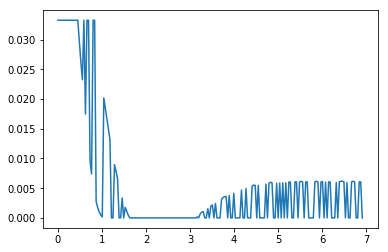

MSE : 357.8552465093007, beta : 0.3593813663804627

Objectif : 1e+30, ||Ku-y||^2 : 5719.357292487693, ||Du||^2 : 5.692787260151106, ind : 1e+30
Objectif : 362.3378782626173, ||Ku-y||^2 : 724.2668819000729, ||Du||^2 : 0.3165767730325742, ind : 0
Objectif : 358.666952099853, ||Ku-y||^2 : 716.9283174275537, ||Du||^2 : 0.3140311078534197, ind : 0
Objectif : 355.0912405442451, ||Ku-y||^2 : 709.7801667157195, ||Du||^2 : 0.3114974078570452, ind : 0
Objectif : 351.5945556740476, ||Ku-y||^2 : 702.7900435337606, ||Du||^2 : 0.30898371556631415, ind : 0
Objectif : 348.17497360179976, ||Ku-y||^2 : 695.9541002755475, ||Du||^2 : 0.3064899002916214, ind : 0
Objectif : 344.8306286635885, ||Ku-y||^2 : 689.2686057767582, ||Du||^2 : 0.30401583543774935, ind : 0
Objectif : 341.5597112559467, ||Ku-y||^2 : 682.7299409888496, ||Du||^2 : 0.30156139836806234, ind : 0
Objectif : 338.3604657654906, ||Ku-y||^2 : 676.3345948385005, ||Du||^2 : 0.29912647027495026, ind : 0
Objectif : 335.23118858696193, ||Ku-y||^2 : 

Objectif : 185.53806861367812, ||Ku-y||^2 : 370.94644388346387, ||Du||^2 : 0.10041684606134141, ind : 0
Objectif : 185.1490398766238, ||Ku-y||^2 : 370.1692636009057, ||Du||^2 : 0.09973766850104837, ind : 0
Objectif : 184.77114962659377, ||Ku-y||^2 : 369.4143490021927, ||Du||^2 : 0.09906723253523339, ind : 0
Objectif : 184.40415348983962, ||Ku-y||^2 : 368.68121137388584, ||Du||^2 : 0.098405511794154, ind : 0
Objectif : 184.0478128770656, ||Ku-y||^2 : 367.9693735700752, ||Du||^2 : 0.09775248097373669, ind : 0
Objectif : 183.70189482704083, ||Ku-y||^2 : 367.27836969966904, ||Du||^2 : 0.0971081157852368, ind : 0
Objectif : 183.3661718550325, ||Ku-y||^2 : 366.60774482332545, ||Du||^2 : 0.09647239290491294, ind : 0
Objectif : 183.04042180589454, ||Ku-y||^2 : 365.95705465969485, ||Du||^2 : 0.09584528992369658, ind : 0
Objectif : 182.72442771165538, ||Ku-y||^2 : 365.32586530066015, ||Du||^2 : 0.09522678529684017, ind : 0
Objectif : 182.41797765344816, ||Ku-y||^2 : 364.71375293526256, ||Du||^2 

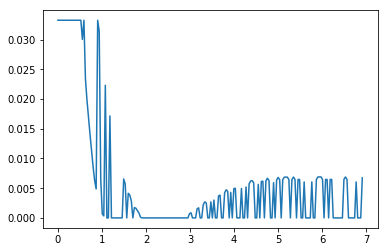

MSE : 351.79783711794175, beta : 1.291549665014884

Objectif : 1e+30, ||Ku-y||^2 : 356.55882028639087, ||Du||^2 : 6.019862370477866, ind : 1e+30
Objectif : 452.38984372341724, ||Ku-y||^2 : 903.2562137762959, ||Du||^2 : 0.32822245251586096, ind : 0
Objectif : 445.4076519969809, ||Ku-y||^2 : 889.3061697226944, ||Du||^2 : 0.32513312259344757, ind : 0
Objectif : 438.6219461023297, ||Ku-y||^2 : 875.7489039135933, ||Du||^2 : 0.32208546354641737, ind : 0
Objectif : 432.0283951834004, ||Ku-y||^2 : 862.5757600737942, ||Du||^2 : 0.31907830402413945, ind : 0
Objectif : 425.62233954751264, ||Ku-y||^2 : 849.7774238017854, ||Du||^2 : 0.3161105702888848, ind : 0
Objectif : 419.39763478508934, ||Ku-y||^2 : 837.3416095913585, ||Du||^2 : 0.3131815485881175, ind : 0
Objectif : 413.3483709970429, ||Ku-y||^2 : 825.2565008491184, ||Du||^2 : 0.31029054847287924, ind : 0
Objectif : 407.4688628617388, ||Ku-y||^2 : 813.5107300319371, ||Du||^2 : 0.30743690203807195, ind : 0
Objectif : 401.75597144630757, ||Ku-y|

Objectif : 196.93947479451657, ||Ku-y||^2 : 393.33658967044846, ||Du||^2 : 0.11684790230816504, ind : 0
Objectif : 196.5403436710921, ||Ku-y||^2 : 392.54238281756153, ||Du||^2 : 0.11597419416482727, ind : 0
Objectif : 196.15389134165358, ||Ku-y||^2 : 391.77348776819775, ||Du||^2 : 0.1151103499819315, ind : 0
Objectif : 195.78535088122956, ||Ku-y||^2 : 391.0403710419109, ||Du||^2 : 0.11425629015387519, ind : 0
Objectif : 195.42956704017132, ||Ku-y||^2 : 390.3327228712761, ||Du||^2 : 0.11341185700346817, ind : 0
Objectif : 195.0853099402816, ||Ku-y||^2 : 389.6480836339405, ||Du||^2 : 0.11257702165230996, ind : 0
Objectif : 194.7523051085893, ||Ku-y||^2 : 388.9859044717409, ||Du||^2 : 0.11175176518897992, ind : 0
Objectif : 194.4302851094332, ||Ku-y||^2 : 388.34565059542996, ||Du||^2 : 0.11093606993096577, ind : 0
Objectif : 194.11898933862892, ||Ku-y||^2 : 387.72680087323357, ||Du||^2 : 0.11012991937641961, ind : 0
Objectif : 193.818163824553, ||Ku-y||^2 : 387.12884743324355, ||Du||^2 : 

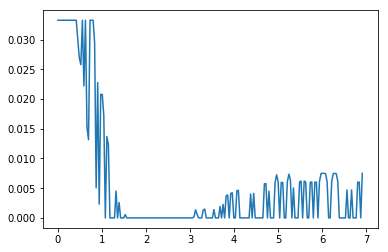

MSE : 365.903056923155, beta : 4.64158883361278

Objectif : 1e+30, ||Ku-y||^2 : 594.3189483781147, ||Du||^2 : 5.689918232416213, ind : 1e+30
Objectif : 416.7088868510481, ||Ku-y||^2 : 827.9090569705056, ||Du||^2 : 0.3302388920056941, ind : 0
Objectif : 410.244743044335, ||Ku-y||^2 : 815.0419791090353, ||Du||^2 : 0.3265694637793484, ind : 0
Objectif : 403.97344293252496, ||Ku-y||^2 : 802.5597835240662, ||Du||^2 : 0.32294830082760145, ind : 0
Objectif : 397.8907556200271, ||Ku-y||^2 : 790.4540405395393, ||Du||^2 : 0.3193734778994303, ind : 0
Objectif : 391.9902266077335, ||Ku-y||^2 : 778.7118544234459, ||Du||^2 : 0.31584419970660865, ind : 0
Objectif : 386.2656619271819, ||Ku-y||^2 : 767.3208500871892, ||Du||^2 : 0.3123596960121125, ind : 0
Objectif : 380.71111623595124, ||Ku-y||^2 : 756.2691492906224, ||Du||^2 : 0.3089192207760812, ind : 0
Objectif : 375.3227770152545, ||Ku-y||^2 : 745.549146751861, ||Du||^2 : 0.30552158967602233, ind : 0
Objectif : 370.09531272526675, ||Ku-y||^2 : 735.

Objectif : 195.3122373534981, ||Ku-y||^2 : 388.85907644491056, ||Du||^2 : 0.10583284536607473, ind : 0
Objectif : 194.65497758875765, ||Ku-y||^2 : 387.56167623827423, ||Du||^2 : 0.10480656892393353, ind : 0
Objectif : 194.01824386290878, ||Ku-y||^2 : 386.3050725063839, ||Du||^2 : 0.1037956154812974, ind : 0
Objectif : 193.4014891985109, ||Ku-y||^2 : 385.0881725979831, ||Du||^2 : 0.10279990688792918, ind : 0
Objectif : 192.8041825820636, ||Ku-y||^2 : 383.9099157359438, ||Du||^2 : 0.10181936821591511, ind : 0
Objectif : 192.22604114294919, ||Ku-y||^2 : 382.7697374866757, ||Du||^2 : 0.10085392107399617, ind : 0
Objectif : 191.66660261860645, ||Ku-y||^2 : 381.6667145282258, ||Du||^2 : 0.09990349333406033, ind : 0
Objectif : 191.1253655727197, ||Ku-y||^2 : 380.5998451252153, ||Du||^2 : 0.09896801681960488, ind : 0
Objectif : 190.6018431996908, ||Ku-y||^2 : 379.56815675881126, ||Du||^2 : 0.09804742604517111, ind : 0
Objectif : 190.0022451076702, ||Ku-y||^2 : 378.3841335177059, ||Du||^2 : 0.0

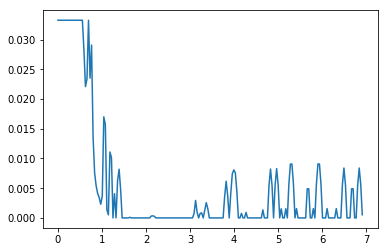

MSE : 355.0815181672387, beta : 16.681005372000598

Objectif : 1e+30, ||Ku-y||^2 : 9419.50825221725, ||Du||^2 : 5.7340191595836165, ind : 1e+30
Objectif : 502.7810000205455, ||Ku-y||^2 : 985.7473223361123, ||Du||^2 : 0.3305287452412097, ind : 0
Objectif : 489.8963298900789, ||Ku-y||^2 : 960.3678991787522, ||Du||^2 : 0.324024535941873, ind : 0
Objectif : 477.627554410687, ||Ku-y||^2 : 936.2114729733732, ||Du||^2 : 0.31766699188292485, ind : 0
Objectif : 465.9475149066634, ||Ku-y||^2 : 913.2239568409332, ||Du||^2 : 0.31145226855351393, ind : 0
Objectif : 454.824212845818, ||Ku-y||^2 : 891.3415673486946, ||Du||^2 : 0.3053768023630585, ind : 0
Objectif : 444.2264301771864, ||Ku-y||^2 : 870.5020757827273, ||Du||^2 : 0.2994371338712447, ind : 0
Objectif : 434.1250016421924, ||Ku-y||^2 : 850.6473527504512, ||Du||^2 : 0.29362990811799433, ind : 0
Objectif : 424.49384072384515, ||Ku-y||^2 : 831.7254403602298, ||Du||^2 : 0.28795153631269943, ind : 0
Objectif : 415.31181143704407, ||Ku-y||^2 : 81

Objectif : 197.073238821625, ||Ku-y||^2 : 391.49537171522627, ||Du||^2 : 0.04422311222710682, ind : 0
Objectif : 197.02402411316692, ||Ku-y||^2 : 391.41993920103306, ||Du||^2 : 0.043839500769245664, ind : 0
Objectif : 196.98388251123544, ||Ku-y||^2 : 391.3621812404535, ||Du||^2 : 0.043463757065029626, ind : 0
Objectif : 196.9486787258737, ||Ku-y||^2 : 391.31358042988984, ||Du||^2 : 0.04309999838165696, ind : 0
Objectif : 196.9237924468129, ||Ku-y||^2 : 391.2849119580852, ||Du||^2 : 0.04274796100443299, ind : 0
Objectif : 196.9065280643401, ||Ku-y||^2 : 391.2708644612107, ||Du||^2 : 0.04240631286171455, ind : 0
Objectif : 196.92723315023372, ||Ku-y||^2 : 391.3326112862167, ||Du||^2 : 0.04206707704012276, ind : 0
Objectif : 196.95757559700695, ||Ku-y||^2 : 391.4130311149085, ||Du||^2 : 0.041737878480947496, ind : 0
Objectif : 197.0033016444433, ||Ku-y||^2 : 391.5235552293813, ||Du||^2 : 0.04141973801954319, ind : 0
Objectif : 197.0519231027548, ||Ku-y||^2 : 391.6392255677926, ||Du||^2 : 

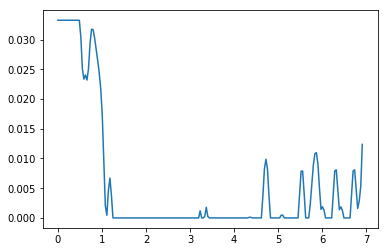

MSE : 380.8740074535918, beta : 59.948425031894104

Objectif : 1e+30, ||Ku-y||^2 : 8826.10991269629, ||Du||^2 : 5.974330781843018, ind : 1e+30
Objectif : 405.1118160840001, ||Ku-y||^2 : 741.2414576184217, ||Du||^2 : 0.32018689110765125, ind : 0
Objectif : 396.61357949357557, ||Ku-y||^2 : 728.5961589861483, ||Du||^2 : 0.299990527909882, ind : 0
Objectif : 388.4518758586988, ||Ku-y||^2 : 716.2847969490723, ||Du||^2 : 0.28136826355793715, ind : 0
Objectif : 380.6123469239105, ||Ku-y||^2 : 704.3055389760663, ||Du||^2 : 0.26419531367141263, ind : 0
Objectif : 373.0864308127229, ||Ku-y||^2 : 692.6660399949362, ||Du||^2 : 0.2483566658022836, ind : 0
Objectif : 365.86025968119515, ||Ku-y||^2 : 681.3613764609111, ||Du||^2 : 0.23374643536181605, ind : 0
Objectif : 358.9231824353523, ||Ku-y||^2 : 670.3912767941194, ||Du||^2 : 0.22026700691438839, ind : 0
Objectif : 352.2653105387272, ||Ku-y||^2 : 659.7553722122577, ||Du||^2 : 0.20782829515493, ind : 0
Objectif : 345.87848589252127, ||Ku-y||^2 : 6

Objectif : 177.69218605153915, ||Ku-y||^2 : 348.80522162458306, ||Du||^2 : 0.03053771139564163, ind : 0
Objectif : 177.4508924636778, ||Ku-y||^2 : 348.36281951239823, ||Du||^2 : 0.030351188853446162, ind : 0
Objectif : 177.22208221191198, ||Ku-y||^2 : 347.94434453489896, ||Du||^2 : 0.03016949141692864, ind : 0
Objectif : 177.0070951469926, ||Ku-y||^2 : 347.55290324207857, ||Du||^2 : 0.0299906378308967, ind : 0
Objectif : 176.8094957890108, ||Ku-y||^2 : 347.19597325009016, ||Du||^2 : 0.02981301014901684, ind : 0
Objectif : 176.61748660609703, ||Ku-y||^2 : 346.8517775258845, ||Du||^2 : 0.0296281698203398, ind : 0
Objectif : 176.40917348934084, ||Ku-y||^2 : 346.4773293258689, ||Du||^2 : 0.029432396731037487, ind : 0
Objectif : 176.2118825818487, ||Ku-y||^2 : 346.1237180967999, ||Du||^2 : 0.02924222811694636, ind : 0
Objectif : 176.02627092788927, ||Ku-y||^2 : 345.7924121049532, ||Du||^2 : 0.029056948348397962, ind : 0
Objectif : 175.85495778142862, ||Ku-y||^2 : 345.4887501475377, ||Du||^2

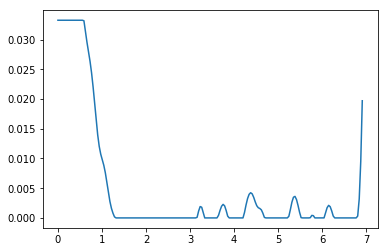

MSE : 370.7494162962068, beta : 215.44346900318848

Objectif : 1e+30, ||Ku-y||^2 : 525.6113742228355, ||Du||^2 : 6.486073065607902, ind : 1e+30
Objectif : 464.9829883474176, ||Ku-y||^2 : 684.5924428400141, ||Du||^2 : 0.31691210545371185, ind : 0
Objectif : 432.4985309133177, ||Ku-y||^2 : 674.269056042992, ||Du||^2 : 0.24633469197882113, ind : 0
Objectif : 407.1385743397933, ||Ku-y||^2 : 662.4666677152569, ||Du||^2 : 0.19607077583522817, ind : 0
Objectif : 387.37076927658455, ||Ku-y||^2 : 650.7163382733847, ||Du||^2 : 0.16018470587475905, ind : 0
Objectif : 371.6930062827756, ||Ku-y||^2 : 639.3707947560102, ||Du||^2 : 0.13434081971836262, ind : 0
Objectif : 358.90338306311276, ||Ku-y||^2 : 628.4111801782219, ||Du||^2 : 0.11545883908495314, ind : 0
Objectif : 348.1609122615791, ||Ku-y||^2 : 617.8258996325133, ||Du||^2 : 0.1013813854975457, ind : 0
Objectif : 338.88688352236363, ||Ku-y||^2 : 607.6072878394165, ||Du||^2 : 0.09062349271289284, ind : 0
Objectif : 330.68890357293753, ||Ku-y||

Objectif : 196.94288788608822, ||Ku-y||^2 : 381.6716932926138, ||Du||^2 : 0.015775094134943275, ind : 0
Objectif : 196.77334115081595, ||Ku-y||^2 : 381.33997605646823, ||Du||^2 : 0.015765567361876197, ind : 0
Objectif : 196.60875133002313, ||Ku-y||^2 : 381.0175397048495, ||Du||^2 : 0.015756858067978288, ind : 0
Objectif : 196.45121941121016, ||Ku-y||^2 : 380.7094099078723, ||Du||^2 : 0.01574790241010125, ind : 0
Objectif : 196.29951357230055, ||Ku-y||^2 : 380.4126572798746, ||Du||^2 : 0.01573930191653494, ind : 0
Objectif : 196.15428282018334, ||Ku-y||^2 : 380.12894087427276, ||Du||^2 : 0.015730590286655594, ind : 0
Objectif : 196.0136751332151, ||Ku-y||^2 : 379.8538139283986, ||Du||^2 : 0.015722726779431134, ind : 0
Objectif : 195.87753803211476, ||Ku-y||^2 : 379.58701380661824, ||Du||^2 : 0.015715656732698046, ind : 0
Objectif : 195.74573205189805, ||Ku-y||^2 : 379.32829710376046, ||Du||^2 : 0.015709334264416078, ind : 0
Objectif : 195.61982840055668, ||Ku-y||^2 : 379.08124683427957,

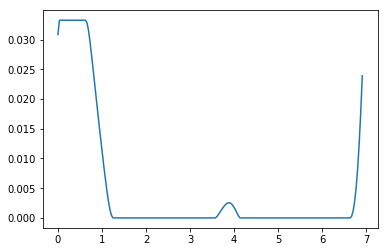

MSE : 389.0326589514087, beta : 774.2636826811284

Objectif : 1e+30, ||Ku-y||^2 : 4039.764358594371, ||Du||^2 : 5.666428260203169, ind : 1e+30
Objectif : 847.8148609528878, ||Ku-y||^2 : 1069.3295460741235, ||Du||^2 : 0.22508061295470289, ind : 0
Objectif : 685.8056969952576, ||Ku-y||^2 : 1046.8332557365782, ||Du||^2 : 0.11671921109620254, ind : 0
Objectif : 629.7956878454036, ||Ku-y||^2 : 1017.6824787891604, ||Du||^2 : 0.08693754990810419, ind : 0
Objectif : 591.5292796468649, ||Ku-y||^2 : 987.8026669367681, ||Du||^2 : 0.07017132938908135, ind : 0
Objectif : 561.4932671400868, ||Ku-y||^2 : 958.5359234167353, ||Du||^2 : 0.059100485234204116, ind : 0
Objectif : 536.3589082079243, ||Ku-y||^2 : 930.3706606421706, ||Du||^2 : 0.0511569153423169, ind : 0
Objectif : 514.5268018921015, ||Ku-y||^2 : 903.519978819336, ||Du||^2 : 0.0451144456665664, ind : 0
Objectif : 495.1090172346196, ||Ku-y||^2 : 878.0057412906639, ||Du||^2 : 0.04032700724720143, ind : 0
Objectif : 477.5778469987373, ||Ku-y||^2

Objectif : 218.32185392956364, ||Ku-y||^2 : 405.86246236288133, ||Du||^2 : 0.011062206065333329, ind : 0
Objectif : 217.99131890307063, ||Ku-y||^2 : 405.14490499378326, ||Du||^2 : 0.01108250655418083, ind : 0
Objectif : 217.6575865365752, ||Ku-y||^2 : 404.42658683998445, ||Du||^2 : 0.01110078232603591, ind : 0
Objectif : 217.32780510408884, ||Ku-y||^2 : 403.7184345895905, ||Du||^2 : 0.011118244445760183, ind : 0
Objectif : 217.00189468254405, ||Ku-y||^2 : 403.01912802036946, ||Du||^2 : 0.011135309930900871, ind : 0
Objectif : 216.6806568270638, ||Ku-y||^2 : 402.3301754985336, ||Du||^2 : 0.011152012830698268, ind : 0
Objectif : 216.36440788694992, ||Ku-y||^2 : 401.6518225854569, ||Du||^2 : 0.011168492275058945, ind : 0
Objectif : 216.05352414255503, ||Ku-y||^2 : 400.9847334556245, ||Du||^2 : 0.011184780028343442, ind : 0
Objectif : 215.73617370123404, ||Ku-y||^2 : 400.31212885788153, ||Du||^2 : 0.011198401917267335, ind : 0
Objectif : 215.41156514408942, ||Ku-y||^2 : 399.6334462516913, 

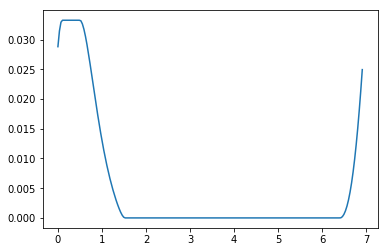

MSE : 379.6715021433939, beta : 2782.559402207128

Objectif : 1e+30, ||Ku-y||^2 : 937.3072392200647, ||Du||^2 : 5.901658592382137, ind : 1e+30
Objectif : 2466.591198079911, ||Ku-y||^2 : 858.566453717012, ||Du||^2 : 0.4074615942442806, ind : 0
Objectif : 2556.4196935492246, ||Ku-y||^2 : 868.2960828685611, ||Du||^2 : 0.42445433042298847, ind : 0
Objectif : 2584.110409809392, ||Ku-y||^2 : 902.7020760191418, ||Du||^2 : 0.42655187435996383, ind : 0
Objectif : 2575.937756649187, ||Ku-y||^2 : 860.7577833555252, ||Du||^2 : 0.42911177299428455, ind : 0
Objectif : 2599.187928583572, ||Ku-y||^2 : 904.7550419451564, ||Du||^2 : 0.4293620815221984, ind : 0
Objectif : 2587.212429498933, ||Ku-y||^2 : 857.6222277007445, ||Du||^2 : 0.43168026312971175, ind : 0
Objectif : 2618.0785544636983, ||Ku-y||^2 : 903.8254493325007, ||Du||^2 : 0.43323316595948913, ind : 0
Objectif : 2596.161991726425, ||Ku-y||^2 : 862.4524238776752, ||Du||^2 : 0.43298715595751713, ind : 0
Objectif : 2617.329487152522, ||Ku-y||^2 :

Objectif : 2609.256800791959, ||Ku-y||^2 : 862.1967382291135, ||Du||^2 : 0.4356316863354801, ind : 0
Objectif : 2631.250110829446, ||Ku-y||^2 : 904.3073107496958, ||Du||^2 : 0.4358192910909192, ind : 0
Objectif : 2609.25170982299, ||Ku-y||^2 : 862.1870857673425, ||Du||^2 : 0.4356316333878633, ind : 0
Objectif : 2631.254810959639, ||Ku-y||^2 : 904.3173944169625, ||Du||^2 : 0.4358192227502312, ind : 0
Objectif : 2609.246626701859, ||Ku-y||^2 : 862.1774246342187, ||Du||^2 : 0.43563158287694953, ind : 0
Objectif : 2631.2595276789684, ||Ku-y||^2 : 904.3274870937028, ||Du||^2 : 0.43581915682642297, ind : 0
Objectif : 2609.241551439033, ||Ku-y||^2 : 862.1677548207738, ||Du||^2 : 0.4356315348057289, ind : 0
Objectif : 2631.264261006978, ||Ku-y||^2 : 904.3375887893213, ||Du||^2 : 0.435819093322463, ind : 0
Objectif : 2609.236484044996, ||Ku-y||^2 : 862.1580763180303, ||Du||^2 : 0.4356314891771958, ind : 0
Objectif : 2631.2690109632395, ||Ku-y||^2 : 904.3476995132337, ||Du||^2 : 0.43581903224132

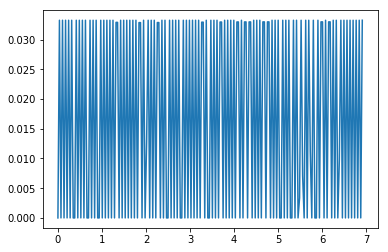

MSE : 984.7066771968583, beta : 10000.00000000001



In [104]:
beta_grid = np.exp(np.log(10)*np.linspace(-1,4,10))

def proximal_gradient_smooth_cons(lamb,K,y,T,xmin,xmax,display = False):
    tol = 1e-4
    max_iter = 200
    nb_iter = 0
    m = K.shape[0]
    n = K.shape[1]
    #print(np.dot(K.T,K))
    #w,v = np.linalg.eig(np.dot(K.T,K))
    #epsilon = 1/np.max(w)
    #print(epsilon)
    epsilon = 1e-4
    u = np.zeros((n,1))
    for i in range(n):
        u[i] = (random.random() - 0.5)
    norm2 = np.linalg.norm(np.dot(K,u) - y)
    normD = np.linalg.norm(np.dot(D,u))
    obj = 0.5*norm2**2 + 0.5*lamb * normD + ind(u,xmin,xmax)
    last_obj = 0
    if display:
        print("Objectif : {}, ||Ku-y||^2 : {}, ||Du||^2 : {}, ind : {}".format(obj,norm2**2,normD,ind(u,xmin,xmax)))
    
    while abs(obj - last_obj) > tol and nb_iter < max_iter:
        w = u - epsilon * (np.dot(K.T,(np.dot(K,u) - y)) + lamb * np.dot(D.T,np.dot(D,u)))
        last_obj = obj
        u = prox_cons(w,xmin,xmax) 
        norm2 = np.linalg.norm(np.dot(K,u) - y)
        normD = np.linalg.norm(np.dot(D,u))
        obj = 0.5*norm2**2 + 0.5*lamb * normD + ind(u,xmin,xmax)
        if display:
            print("Objectif : {}, ||Ku-y||^2 : {}, ||Du||^2 : {}, ind : {}".format(obj,norm2**2,normD,ind(u,xmin,xmax)))
        nb_iter += 1
    
    plt.plot(np.log(T),u)
    plt.show()
    return u
        
def prox_cons(w,xmin,xmax):
    n = w.shape[0]
    out = np.zeros((n,1))
    for index in range(n):
        value = w[index,1]
        if value >  xmax:
            out[index] = xmax
        elif value <  xmin:
            out[index] = xmin
        elif value >= xmin and value <= xmax:
            out[index] = value
    #print(out)
    return out

def ind(x,xmin,xmax):
    n = x.shape[0]
    for i in range(n):
        if x[i] > xmax or x[i] < xmin:
            return 1e30
    return 0

for i in range(beta_grid.shape[0]):
    beta = beta_grid[i]
    x_hat = proximal_gradient_smooth_cons(beta,K,y,T,xmin,xmax,True) #,True
    print("MSE : {}, beta : {}\n".format(normalized_MSE(x_hat,x),beta))

### Sparsity 


Objectif : 51.69458477654833, ||Ku-y||^2 : 103.38821474764637, ||u|| : 0.47740272514694776
Objectif : 51.28151612446091, ||Ku-y||^2 : 102.56207828121326, ||u|| : 0.4769838542746867
Objectif : 50.88111718641388, ||Ku-y||^2 : 101.76128107368797, ||u|| : 0.47664956989459684
Objectif : 50.49322671193434, ||Ku-y||^2 : 100.98550036579168, ||u|| : 0.4765290385011916
Objectif : 50.11768329565941, ||Ku-y||^2 : 100.23441332913515, ||u|| : 0.47663109183894614
Objectif : 49.75432770032536, ||Ku-y||^2 : 99.5077018466383, ||u|| : 0.47677700621620933
Objectif : 49.40300689973488, ||Ku-y||^2 : 98.8050595327644, ||u|| : 0.4771333526816576
Objectif : 49.06356253515353, ||Ku-y||^2 : 98.12616962780348, ||u|| : 0.4777212517906853
Objectif : 48.735841787177506, ||Ku-y||^2 : 97.4707268989024, ||u|| : 0.4783377263038596
Objectif : 48.419694790129235, ||Ku-y||^2 : 96.83843104939352, ||u|| : 0.47926543247776887
Objectif : 48.11496948597, ||Ku-y||^2 : 96.22897852061733, ||u|| : 0.4802256613318091
Objectif : 47.8

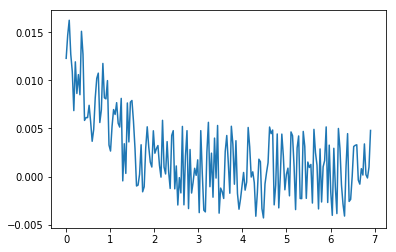

MSE : 198.71892278299546, beta : 0.0009999999999999994
Objectif : 56.04670961952737, ||Ku-y||^2 : 112.08334535669825, ||u|| : 0.503694117824453
Objectif : 55.50719598216308, ||Ku-y||^2 : 111.00434949101333, ||u|| : 0.5021236656418896
Objectif : 54.98198815473276, ||Ku-y||^2 : 109.9539573775419, ||u|| : 0.5009465961812645
Objectif : 54.4709231719378, ||Ku-y||^2 : 108.9318480685763, ||u|| : 0.4999137649646982
Objectif : 53.973786538896725, ||Ku-y||^2 : 107.9375890173441, ||u|| : 0.4992030224678012
Objectif : 53.49039981560562, ||Ku-y||^2 : 106.97082972369411, ||u|| : 0.4984953758563597
Objectif : 53.02061655913959, ||Ku-y||^2 : 106.03127593131062, ||u|| : 0.4978593484281812
Objectif : 52.564239354412834, ||Ku-y||^2 : 105.11852973804238, ||u|| : 0.49744853916423226
Objectif : 52.121107483517235, ||Ku-y||^2 : 104.23227193652004, ||u|| : 0.4971515257221057
Objectif : 51.69104125142442, ||Ku-y||^2 : 103.37214537547332, ||u|| : 0.4968563687760491
Objectif : 51.27387462878669, ||Ku-y||^2 : 102

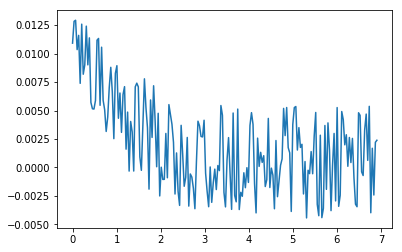

MSE : 199.14084897821118, beta : 0.009999999999999995
Objectif : 52.870628958157276, ||Ku-y||^2 : 105.63986519954528, ||u|| : 0.5069635838463591
Objectif : 52.42712448688517, ||Ku-y||^2 : 104.75305108709979, ||u|| : 0.5059894333527055
Objectif : 51.99691250011616, ||Ku-y||^2 : 103.89281295800583, ||u|| : 0.5050602111324416
Objectif : 51.579780382417475, ||Ku-y||^2 : 103.05866544908748, ||u|| : 0.5044765787373215
Objectif : 51.17538280803262, ||Ku-y||^2 : 102.24998235888417, ||u|| : 0.5039162859053978
Objectif : 50.783555137936816, ||Ku-y||^2 : 101.46643876148545, ||u|| : 0.5033575719408955
Objectif : 50.404136657432005, ||Ku-y||^2 : 100.70771322903164, ||u|| : 0.5028004291618184
Objectif : 50.03696838319659, ||Ku-y||^2 : 99.97348779640855, ||u|| : 0.5022448499231476
Objectif : 49.68206096163263, ||Ku-y||^2 : 99.26376507831455, ||u|| : 0.5017842247535628
Objectif : 49.33925515081569, ||Ku-y||^2 : 98.57818817336205, ||u|| : 0.5016106413466147
Objectif : 49.0082168771764, ||Ku-y||^2 : 97.

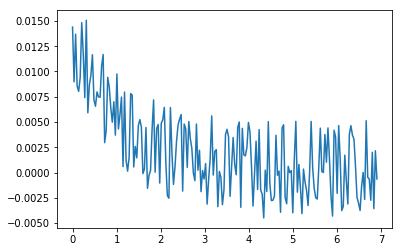

MSE : 199.35965531483814, beta : 0.09999999999999998
Objectif : 50.76525566384031, ||Ku-y||^2 : 100.46854950332742, ||u|| : 0.5309809121765962
Objectif : 50.39446091513817, ||Ku-y||^2 : 99.73084696156157, ||u|| : 0.5290374343573864
Objectif : 50.037025332432016, ||Ku-y||^2 : 99.01970773604776, ||u|| : 0.5271714644081309
Objectif : 49.69151417436146, ||Ku-y||^2 : 98.3321899192073, ||u|| : 0.5254192147578123
Objectif : 49.35893033462014, ||Ku-y||^2 : 97.67034064710798, ||u|| : 0.523760011066151
Objectif : 49.03999121418545, ||Ku-y||^2 : 97.03546564044514, ||u|| : 0.5222583939628769
Objectif : 48.733229437191895, ||Ku-y||^2 : 96.42432634552551, ||u|| : 0.5210662644291348
Objectif : 48.44030106687031, ||Ku-y||^2 : 95.84074070286667, ||u|| : 0.5199307154369791
Objectif : 48.160062476131074, ||Ku-y||^2 : 95.28139917556454, ||u|| : 0.5193628883488022
Objectif : 47.891950186208206, ||Ku-y||^2 : 94.74603570503356, ||u|| : 0.518932333691423
Objectif : 47.63411656921621, ||Ku-y||^2 : 94.231022369

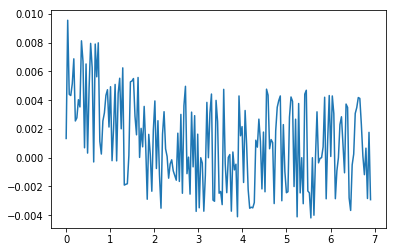

MSE : 198.1236589225531, beta : 1.0
Objectif : 54.38608977727352, ||Ku-y||^2 : 99.50027937881724, ||u|| : 0.46359500878648996
Objectif : 53.874546058791296, ||Ku-y||^2 : 98.86021250370202, ||u|| : 0.4444439806940286
Objectif : 53.4143727418275, ||Ku-y||^2 : 98.30392363464722, ||u|| : 0.42624109245038905
Objectif : 52.98289199508476, ||Ku-y||^2 : 97.79515162347586, ||u|| : 0.40853161833468343
Objectif : 52.56601377323001, ||Ku-y||^2 : 97.30864294826375, ||u|| : 0.39116922990981373
Objectif : 52.16694017840623, ||Ku-y||^2 : 96.8500064101985, ||u|| : 0.3741936973306975
Objectif : 51.7748219429193, ||Ku-y||^2 : 96.40240531536332, ||u|| : 0.35736192852376414
Objectif : 51.39291160440998, ||Ku-y||^2 : 95.96788086872847, ||u|| : 0.34089711700457426
Objectif : 51.048109174125436, ||Ku-y||^2 : 95.5922582924165, ||u|| : 0.32519800279171823
Objectif : 50.7429289618612, ||Ku-y||^2 : 95.28067365012107, ||u|| : 0.31025921368006687
Objectif : 50.465120854904484, ||Ku-y||^2 : 95.00981333746847, ||u|| 

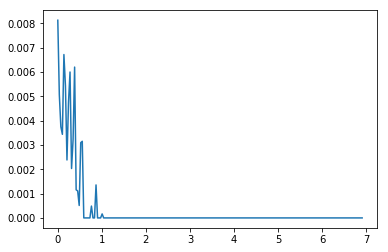

MSE : 196.41537288620586, beta : 10.000000000000002
Objectif : 101.52723043644103, ||Ku-y||^2 : 101.65094723298203, ||u|| : 0.5070175681995
Objectif : 82.67839929388632, ||Ku-y||^2 : 100.69454263340805, ||u|| : 0.3233112797718227
Objectif : 67.70091320191918, ||Ku-y||^2 : 100.44518073690763, ||u|| : 0.1747832283346536
Objectif : 57.78186721454623, ||Ku-y||^2 : 100.42308980275499, ||u|| : 0.07570322313168737
Objectif : 52.02824830615998, ||Ku-y||^2 : 100.54411130992594, ||u|| : 0.01756192651197014
Objectif : 50.63505302281693, ||Ku-y||^2 : 101.11957597548634, ||u|| : 0.0007526503507375895
Objectif : 50.642635784281715, ||Ku-y||^2 : 101.28527156856343, ||u|| : 0.0
Objectif : 50.642635784281715, ||Ku-y||^2 : 101.28527156856343, ||u|| : 0.0


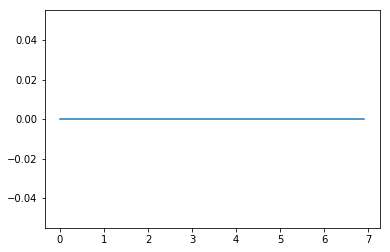

MSE : 200.00000000000003, beta : 100.00000000000004
Objectif : 564.7941487947584, ||Ku-y||^2 : 103.47601089138423, ||u|| : 0.5130561433490659
Objectif : 50.642635784281715, ||Ku-y||^2 : 101.28527156856343, ||u|| : 0.0
Objectif : 50.642635784281715, ||Ku-y||^2 : 101.28527156856343, ||u|| : 0.0


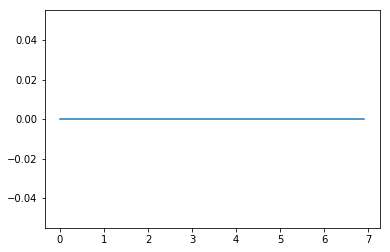

MSE : 200.00000000000003, beta : 1000.0000000000007


In [73]:
def proximal_gradient_norme1(lamb,K,y,T,display = False):
    tol = 1e-3
    max_iter = 100
    nb_iter = 0
    m = K.shape[0]
    n = K.shape[1]
    #print(np.dot(K.T,K))
    #w,v = np.linalg.eig(np.dot(K.T,K))
    #epsilon = 1/np.max(w)
    #print(epsilon)
    epsilon = 1e-5
    u = np.zeros((n,1))
    for i in range(n):
        u[i] = (random.random() - 0.5)/100
    norm2 = np.linalg.norm(np.dot(K,u) - y)
    norm1 = np.linalg.norm(u,1)
    obj = 0.5*norm2**2 + lamb * norm1
    last_obj = 0
    if display:
        print("Objectif : {}, ||Ku-y||^2 : {}, ||u|| : {}".format(obj,norm2**2,norm1))
    
    while abs(obj - last_obj) > tol and nb_iter < max_iter:
        w = u - epsilon * np.dot(K.T,(np.dot(K,u) - y))
        last_obj = obj
        u = prox_norme1(w,lamb,epsilon) 
        norm2 = np.linalg.norm(np.dot(K,u) - y)
        norm1 = np.linalg.norm(u,1)
        obj = 0.5*norm2**2 + lamb * norm1
        if display:
            print("Objectif : {}, ||Ku-y||^2 : {}, ||u|| : {}".format(obj,norm2**2,norm1))
        nb_iter += 1
    
    plt.plot(np.log(T),u)
    plt.show()
    return u
        
def prox_norme1(w,lamb,epsilon):
    n = w.shape[0]
    tol = 1e-9
    out = np.zeros((n,1))
    for index in range(n):
        value = w[index,1]
        if value >  epsilon * lamb + tol:
            out[index] = value - epsilon * lamb
        elif value <  -epsilon * lamb - tol:
            out[index] = value + epsilon * lamb 
        elif value >=  -epsilon * lamb - tol and value <= epsilon * lamb + tol:
            out[index] = 0
    #print(out)
    return out

for i in range(beta_grid.shape[0]):
    beta = beta_grid[i]
    x_hat = proximal_gradient_norme1(beta,K,y,T,True)
    print("MSE : {}, beta : {}".format(normalized_MSE(x_hat,x),beta))

In [15]:
def W(u):
    
    output = np.zeros(u.shape)
    for index,val in enumerate(u):
        
        if val >= 100:
            output[index] = val - log(val)
    
        if val < 100 and val > - 20 :
            w = 1
            v = 0
            while abs(w - v)/abs(w) > 1.e-8:
                v = w
                e = np.exp(w)
                f = w*e - val
                w = w - f/((e*(w+1) - (w+2)*f/(2*w+2)))
            output[index] = w
            
        if val <=-20:
            output[index] = 0
        
    return output
        

In [16]:
W(np.array([1,2,0]))

/home/maximilien/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/home/maximilien/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


array([0.56714329, 0.8526055 , 0.        ])